In [32]:
import numpy as np
data2=np.load('feature_bert_vec.npz')

In [36]:
feature= data2['arr_0']

In [37]:
feature.shape

(2400677, 768)

In [16]:
# loading feature

#print(feature.shape)
data= np.load('feature_label.npz')
feature_label=data['arr_0']
#print(feature_label.shape)
data=np.load('feature_index.npz')
feature_index=data['arr_0']
#print(feature_index[3])

# loading title 
data=np.load('title_bert_vec.npz')
title=data['arr_0']
#print(title.shape)
data=np.load('title_label.npz')
title_label=data['arr_0']
#print(title_label.shape)

data=np.load('title_index.npz')
title_index=data['arr_0']
#print(title_index)

In [40]:
print(feature.shape,feature_label.shape,feature_index.shape)
print(title.shape,title_label.shape, title_index.shape)

(2400677, 768) (2400677,) (2400677,)
(2999754, 768) (2999754,) (2999754,)


In [62]:
feature_index[3]

4

Logistics Model 

In [21]:
# splitting data

import numpy as np
from sklearn.model_selection import train_test_split
#from dask_ml.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

xtrain,xtest,ytrain,ytest=train_test_split(title,title_label,test_size=0.4, stratify=title_label)
#xtrain,xtest,ytrain,ytest=train_test_split(feature,feature_label,test_size=0.2,stratify=feature_label,random_state=123,shuffle=False)


In [22]:
## build logistic model with title 
import joblib
logcv_title=LogisticRegressionCV(cv=5,solver='lbfgs',max_iter=1000000,multi_class='multinomial',random_state=42).fit(xtrain,ytrain)
title_log_bert= joblib.dump(logcv_title,'LogisticModel_title_bert.pkl',compress=('gzip',3))
# loading pretrained model 
logcv_title= joblib.load('LogisticModel_title_bert.pkl')

In [25]:
## training cv score 
cv_scores= logcv_title.scores_
for class_label,scores in cv_scores.items():
    avg_scores=np.mean(scores)
    print(f'Category',class_label,'has average cv score = ',avg_scores)

# prediction 
from sklearn.metrics import confusion_matrix,classification_report
ypred=logcv_title.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))





Category 0 has average cv score =  0.9583810221132577
Category 1 has average cv score =  0.9583810221132577
Category 2 has average cv score =  0.9583810221132577
[[378550   1928  19501]
 [  1780 395018   3202]
 [ 16700   3270 379953]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    399979
           1       0.99      0.99      0.99    400000
           2       0.94      0.95      0.95    399923

    accuracy                           0.96   1199902
   macro avg       0.96      0.96      0.96   1199902
weighted avg       0.96      0.96      0.96   1199902



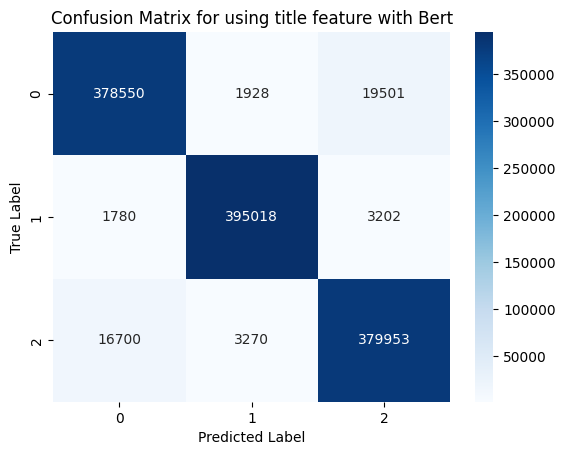

In [28]:
#plotting
import seaborn as sns 
from matplotlib import pyplot as plt
plt.figure()
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel("True Label")
plt.title('Confusion Matrix for using title feature with Bert')
plt.show()


In [43]:
# splitting data

import numpy as np
from sklearn.model_selection import train_test_split
#from dask_ml.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

xtrain,xtest,ytrain,ytest=train_test_split(feature,feature_label,test_size=0.4, stratify=feature_label)


In [44]:
## Build logistic model with feature 
#logcv=LogisticRegressionCV(cv=5,solver='lbfgs',max_iter=1000000,multi_class='multinomial',random_state=42).fit(xtrain,ytrain)
# saving for future use
import joblib
#feature_log_bert= joblib.dump(logcv,'LogisticModel_feature_bert.pkl',compress=('gzip',3))
# loading pretrained model 
logcv= joblib.load('LogisticModel_feature_bert.pkl')

In [45]:
from sklearn.metrics import classification_report
## training error
print(classification_report(ytrain,logcv.predict(xtrain)))
## testing error
ypred=logcv.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94    435575
           1       0.99      0.99      0.99    533894
           2       0.94      0.95      0.95    470937

    accuracy                           0.96   1440406
   macro avg       0.96      0.96      0.96   1440406
weighted avg       0.96      0.96      0.96   1440406

              precision    recall  f1-score   support

           0       0.95      0.94      0.94    290384
           1       0.99      0.99      0.99    355929
           2       0.94      0.95      0.95    313958

    accuracy                           0.96    960271
   macro avg       0.96      0.96      0.96    960271
weighted avg       0.96      0.96      0.96    960271



[[272134   1206  17044]
 [  1259 352711   1959]
 [ 13206   1765 298987]]


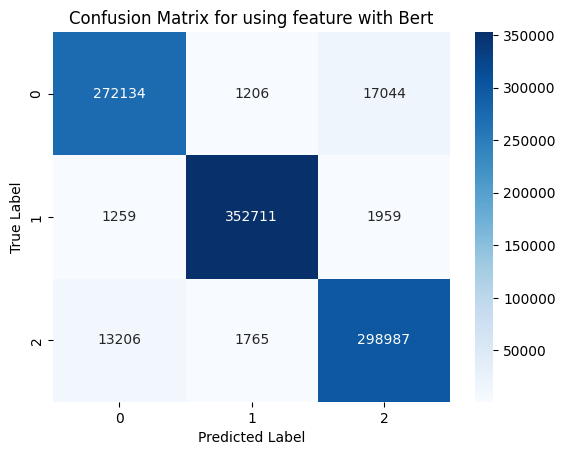

In [46]:
#plotting
import seaborn as sns 
from matplotlib import pyplot as plt
print(confusion_matrix(ytest,ypred))
plt.figure()
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel("True Label")
plt.title('Confusion Matrix for using feature with Bert')
plt.show()

In [58]:
## training model with reduced dataset- combining 2 features 
c_title=np.load('combine_title.npz')['arr_0']
c_label=np.load('combine_label.npz')['arr_0']
c_index= np.load('combine_index.npz')['arr_0']
c_feature=np.load('combine_feature.npz')['arr_0']

In [59]:
## newdataset size
c_title.shape
c_feature.shape

(37500, 768)

In [74]:
c= np.hstack((c_title,c_feature))
print(c[0].shape)

(1536,)


In [75]:
#split new data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(c,c_label,stratify=c_label,test_size=.3,random_state=123)

In [77]:
#logistic 
from sklearn.linear_model import LogisticRegressionCV
logmod2=LogisticRegressionCV(multi_class='multinomial',cv=5,solver='lbfgs',max_iter=10000).fit(xtrain,ytrain)

In [93]:
ytrainpred=logmod2.predict(xtrain)
print(confusion_matrix(ytrain,ytrainpred))
print(classification_report(ytrain,ytrainpred))


[[7391   82 1277]
 [  57 8508  185]
 [1015  202 7533]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      8750
           1       0.97      0.97      0.97      8750
           2       0.84      0.86      0.85      8750

    accuracy                           0.89     26250
   macro avg       0.89      0.89      0.89     26250
weighted avg       0.89      0.89      0.89     26250



In [83]:

# Define parameter grid
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_dist = {
    'penalty': ['l1', 'l2','none'],
    'C': np.logspace(-4, 4, 20),
}
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=1000, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(xtrain, ytrain)
# Best parameters from random search
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on test set
best_model = random_search.best_estimator_
test_score = best_model.score(xtest, ytest)
print("Test Set Score:", test_score)



c:\Users\Owner\anaconda3\envs\myEnv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 60 is smaller than n_iter=1000. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 60 candidates, totalling 300 fits


c:\Users\Owner\anaconda3\envs\myEnv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
200 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Owner\anaconda3\envs\myEnv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Owner\anaconda3\envs\myEnv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Owner\anaconda3\envs\myEnv\Lib\site-packages\sklearn\linear_model\

Best Parameters: {'penalty': 'l2', 'C': 0.23357214690901212}
Test Set Score: 0.8533333333333334


In [89]:
best_model

LogisticRegression(C=0.23357214690901212, max_iter=1000)

[[3016   67  667]
 [  72 3541  137]
 [ 564  143 3043]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      3750
           1       0.94      0.94      0.94      3750
           2       0.79      0.81      0.80      3750

    accuracy                           0.85     11250
   macro avg       0.85      0.85      0.85     11250
weighted avg       0.85      0.85      0.85     11250



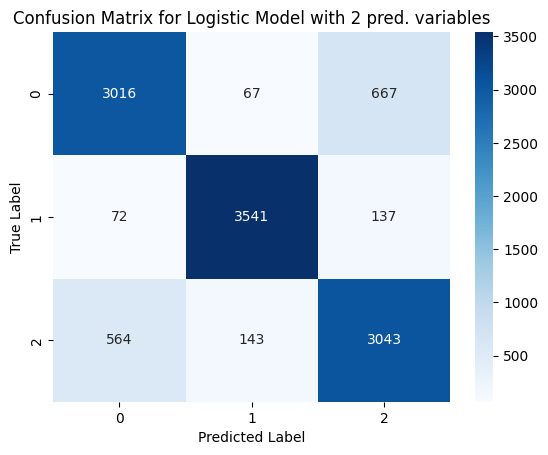

In [94]:
#prediction

ytestpred=best_model.predict(xtest)
print(confusion_matrix(ytest,ytestpred))
print(classification_report(ytest,ytestpred))

import seaborn as sns 
from matplotlib import pyplot as plt
plt.figure()
sns.heatmap(confusion_matrix(ytest,ytestpred), annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel("True Label")
plt.title('Confusion Matrix for Logistic Model with 2 pred. variables')
plt.show()

VISUALIZATION by SAMPLING

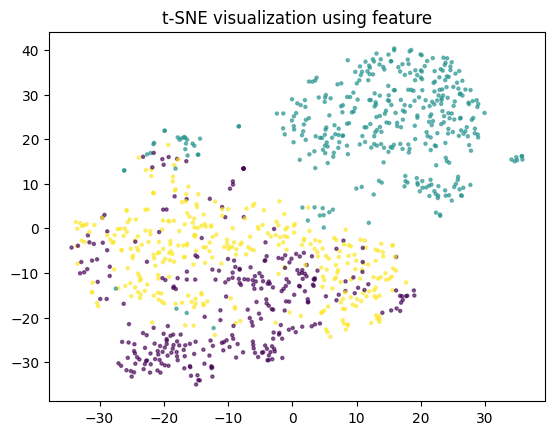

In [48]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


sampletrain,sampletest,trainresponse,testresponse = train_test_split(feature,feature_label, train_size=1000, stratify=feature_label, random_state=42)
X=sampletrain
Y=trainresponse

# Step 1: Apply PCA to reduce dimensions
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Step 2: Apply Barnes-Hut t-SNE
tsne = TSNE(n_components=2, method='barnes_hut', random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Step 3: Plot the result
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5, alpha=0.6,c=trainresponse)
plt.title("t-SNE visualization using feature")
plt.show()


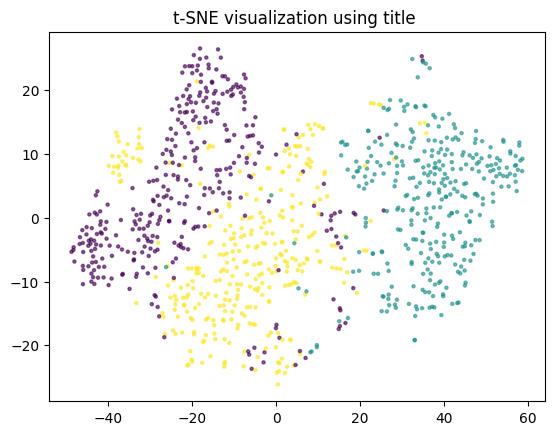

In [31]:
# Visualization using title 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sampletrain,sampletest,trainresponse,testresponse = train_test_split(title,title_label, train_size=1000, stratify=title_label, random_state=42)
X=sampletrain
Y=trainresponse

# Step 1: Apply PCA to reduce dimensions
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Step 2: Apply Barnes-Hut t-SNE
tsne = TSNE(n_components=2, method='barnes_hut', random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Step 3: Plot the result
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=5, alpha=0.6,c=trainresponse)
plt.title("t-SNE visualization using title ")
plt.show()

In [47]:
## Knn models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(feature,feature_label, test_size=0.4, stratify=feature_label, random_state=42)
# build model 
#knnmod=KNeighborsClassifier(n_neighbors=5,weights='distance',metric='cosine',n_jobs=-1).fit(xtrain,ytrain)
# saving knn model with n=5
import joblib
#feature_knn_bert= joblib.dump(knnmod,'KnnModel_feature_bert.pkl',compress=('gzip',3))
# calling for reuse
knnmod=joblib.load('KnnModel_feature_bert.pkl')

In [ ]:
#from sklearn.metrics import classification_report
#ypred=knnmod.predict(xtest)
#print(classification_report(ytest,ypred))

In [ ]:
#def predict_in_batches(model, X_test, batch_size=10):
#    n_samples = xtest.shape[0]
#    ypred = np.empty(n_samples)
    
#    for start in range(0, n_samples, batch_size):
#        end = min(start + batch_size, n_samples)
#        xbatch = xtest[start:end]
#        ypred[start:end] = model.predict(xbatch)
    
#    return ypred

# Make predictions in batches
#batch_size = 500000
#ypred = predict_in_batches(knnmod, xtest, batch_size)

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
print(confusion_matrix(ytest,ypred))
plt.figure()
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel("True Label")
plt.title(' Confusion Matrix for KNN Model')
plt.show()

In [ ]:
## saving prediction and its true label for future use 
#import pandas as pd
#temp = pd.DataFrame({'True Label': ytest, 'Predicted Label': ypred})
#temp.to_csv('KNN_model_predictions.csv', index=False)

## identify the false prediction and save for sub-sample 
#misclassified_indices = ytest != ypred
#X_misclassified = xtest[misclassified_indices]
##y_true_misclassified = ytest[misclassified_indices]
#y_pred_misclassified = ypred[misclassified_indices]

# Create a DataFrame for misclassified instances
#df_misclassified = pd.DataFrame(X_misclassified)
#df_misclassified['True Label'] = y_true_misclassified
# Save the misclassified instances to a CSV file
#df_misclassified.to_csv('knn_misclassified.csv', index=False)

In [ ]:
#from sklearn.model_selection import cross_val_score
#knn=KNeighborsClassifier(n_neighbors=5,weights='distance',metric='cosine',n_jobs=-1)
#cv_scores = cross_val_score(knn, xtrain, ytrain, cv=5, scoring='f1_macro')

# Print the cross-validation scores for k = 5
#print("Cross-validation scores:", cv_scores)
#print("Mean cross-validation score:", np.mean(cv_scores))